In [4]:
import sys
sys.path.append('/home/boris/projects/aimasters/utils/')
from utils import *
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer

import optuna

/home/boris/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data = pd.read_csv('train.csv')
pr
data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,y
0,-2.509198,9.014286,4.639879,1.973170,-6.879627,-6.880110,-8.838328,7.323523,2.022300,4.161452,...,6.648853,-5.753218,-6.363501,-6.331910,-3.915155,0.495129,-1.361100,-4.175417,2.237058,38.446314
1,-7.210123,-4.157107,-2.672763,-0.878600,5.703519,-6.006524,0.284689,1.848291,-9.070992,2.150897,...,8.977711,9.312641,6.167947,-3.907725,-8.046558,3.684661,-1.196950,-7.559235,-0.096462,12.794101
2,-9.312230,8.186408,-4.824400,3.250446,-3.765778,0.401360,0.934206,-6.302911,9.391693,5.502656,...,1.958000,8.437485,-8.230150,-6.080343,-9.095454,-3.493393,-2.226454,-4.573019,6.574750,31.741684
3,-2.864933,-4.381310,0.853922,-7.181516,6.043940,-8.508987,9.737739,5.444895,-6.025686,-9.889558,...,4.580143,5.425407,-8.519107,-2.830685,-7.682619,7.262069,2.465963,-3.382040,-8.728833,6.389571
4,-3.780354,-3.496334,4.592124,2.751149,7.744255,-0.555701,-7.608115,4.264896,5.215701,1.225544,...,0.454657,-1.449180,-9.491617,-7.842171,-9.371416,2.728208,-3.712880,0.171414,8.151329,16.003422


/home/boris/projects/aimasters/utils/utils.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


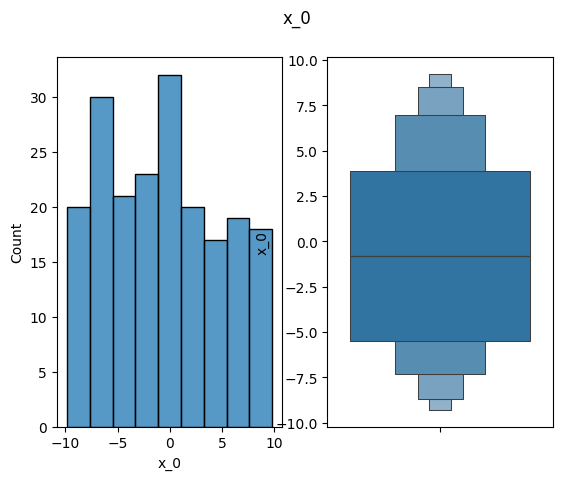

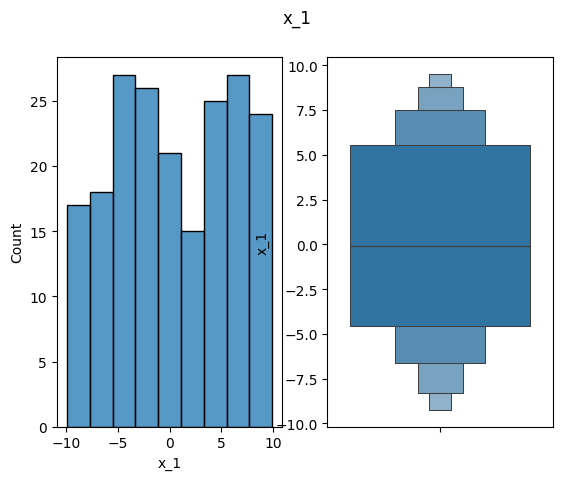

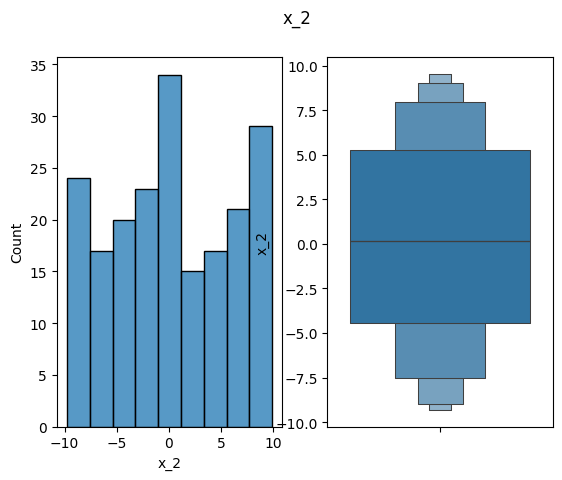

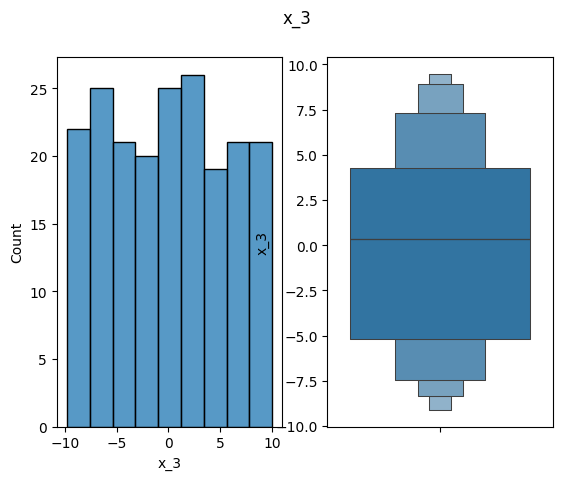

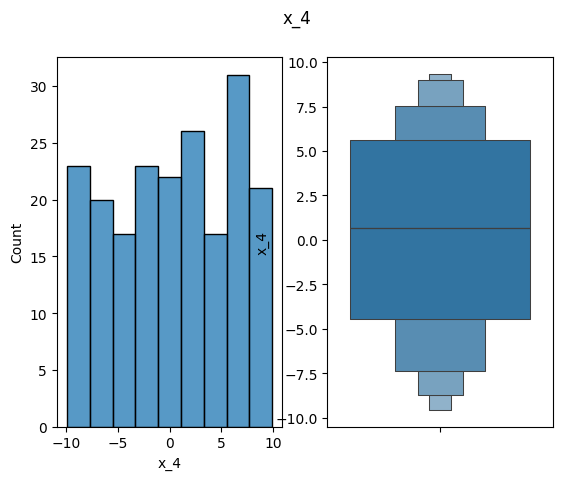

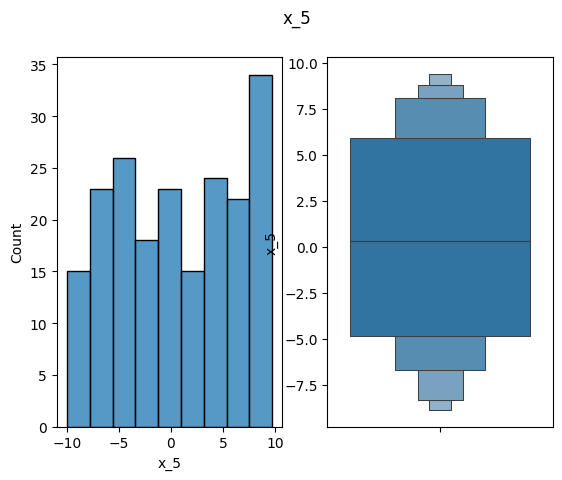

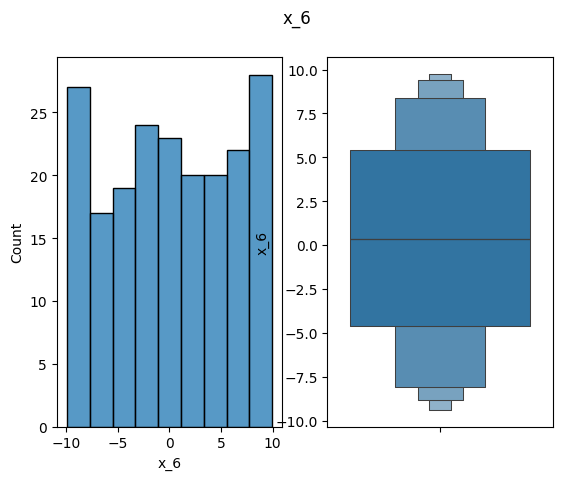

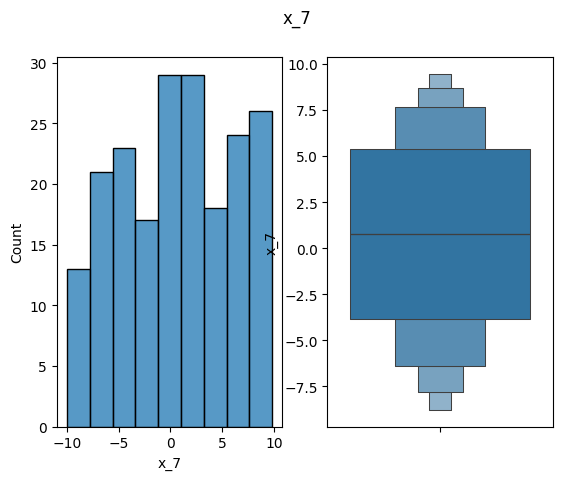

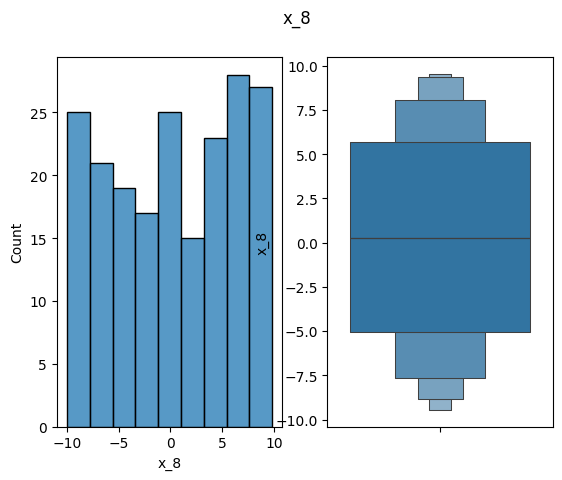

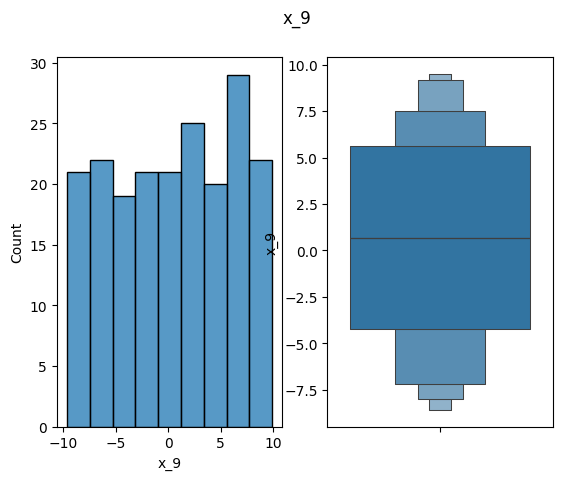

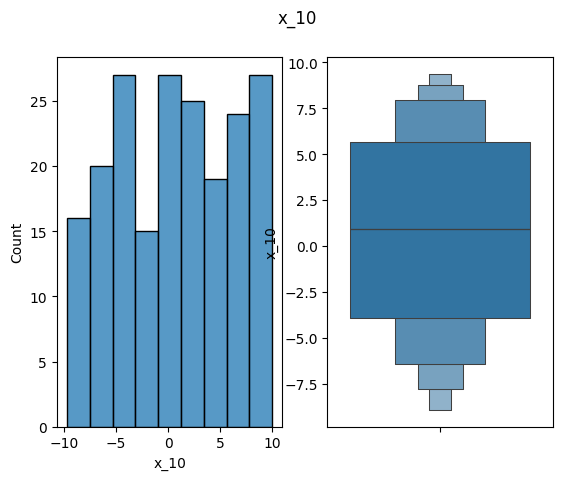

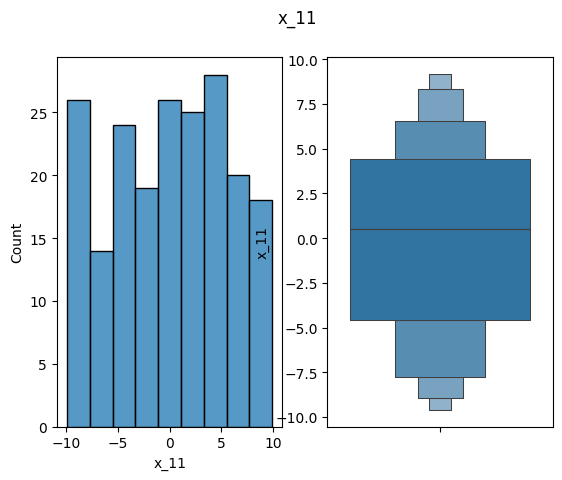

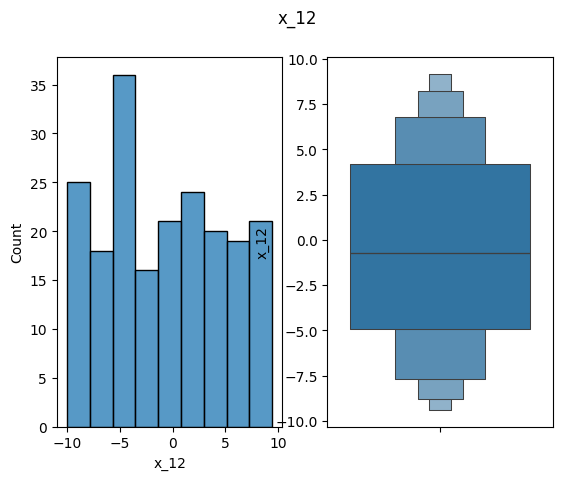

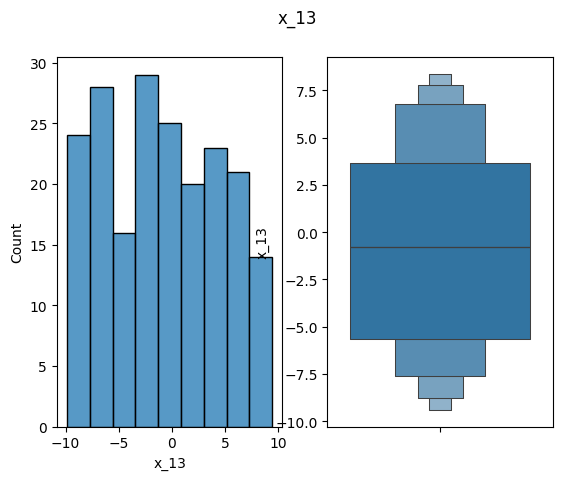

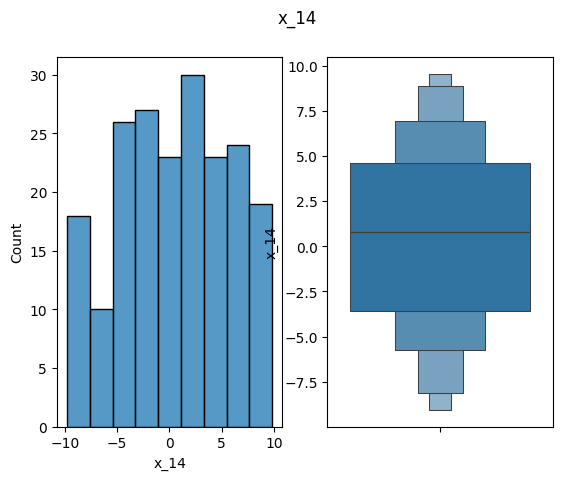

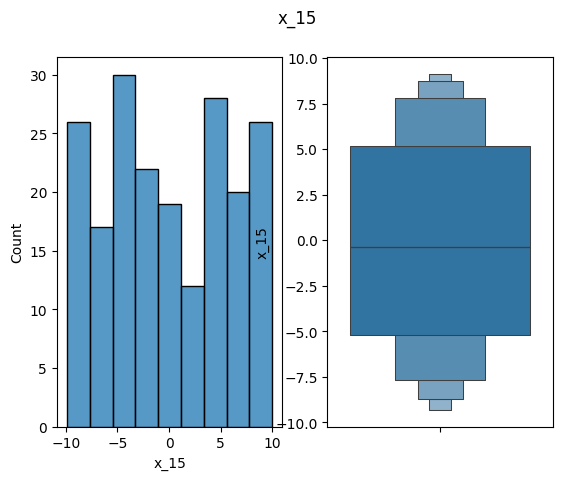

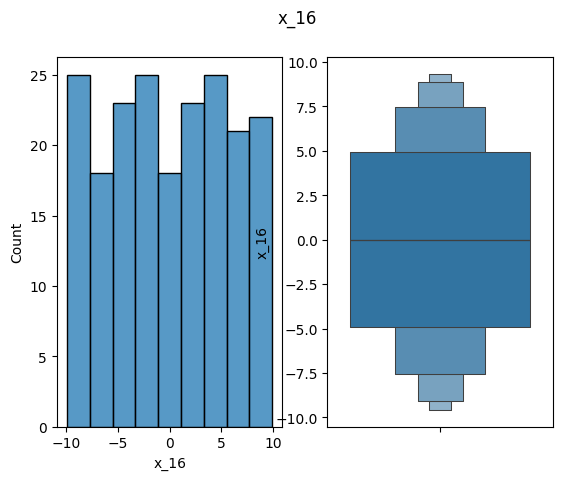

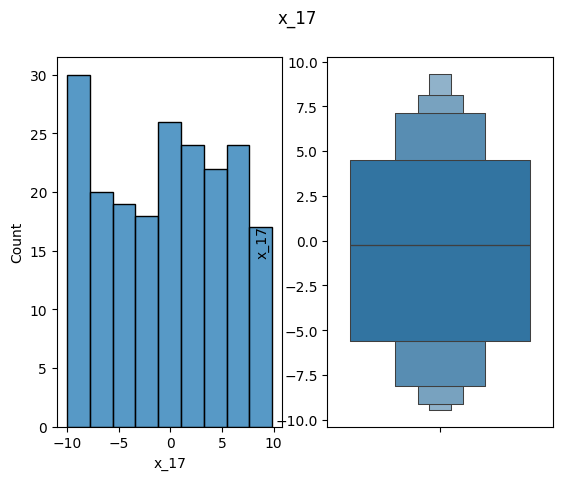

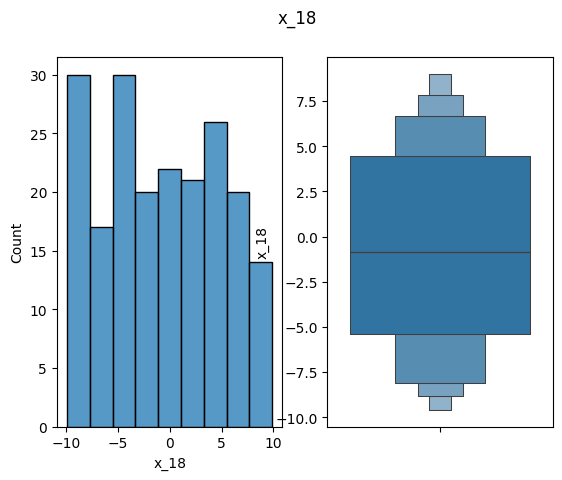

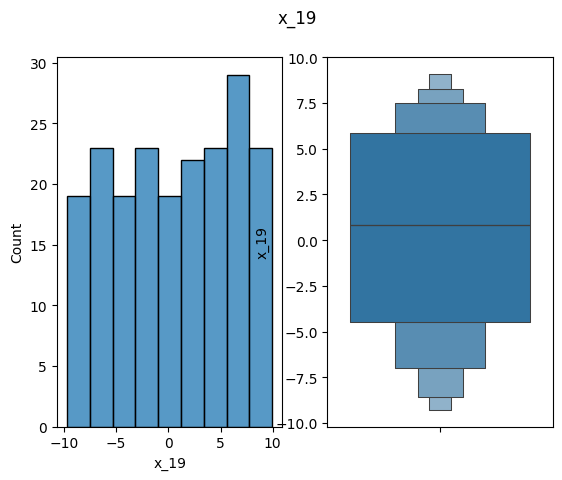

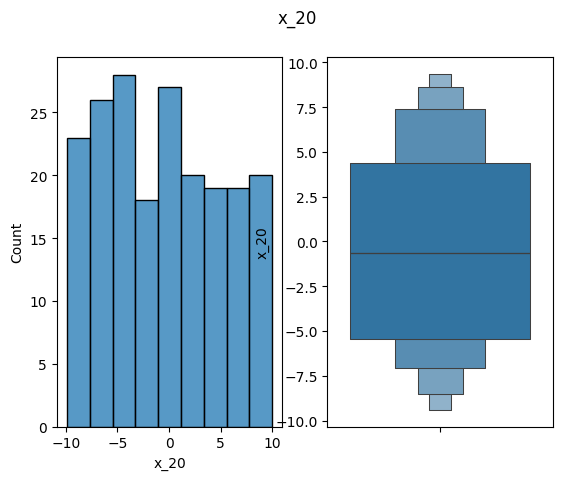

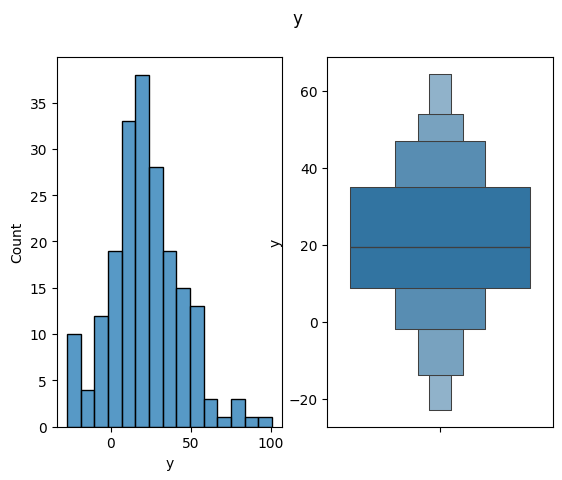

In [46]:
plot_density(data)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 
	'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'y']


In [41]:
train, test = get_split(data, 0.15)
X_train, y_train = train.drop('y', axis=1), train['y']
X_test, y_test = test.drop('y', axis=1), test['y']
print(X_train.shape, y_train.shape)
features = train.drop('y', axis=1).columns
target = 'y'

(8500, 21) (8500,)


In [42]:
# for i in range(10):
#     learning_rate = 0.01 * 1.48**i 
#     print('learning rate = ', learning_rate)
#     train_model(tr = train, val = test, features = features, target_col = 'y', params={'objective': 'regression', 'learning_rate':learning_rate}, shadow_features=False, sklearn_style=False)
final_model = train_model(tr = train, val = test, features = features, target_col = 'y', params={'objective': 'regression', 'learning_rate':0.05}, shadow_features=False, sklearn_style=False)


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's auc: 0.93968


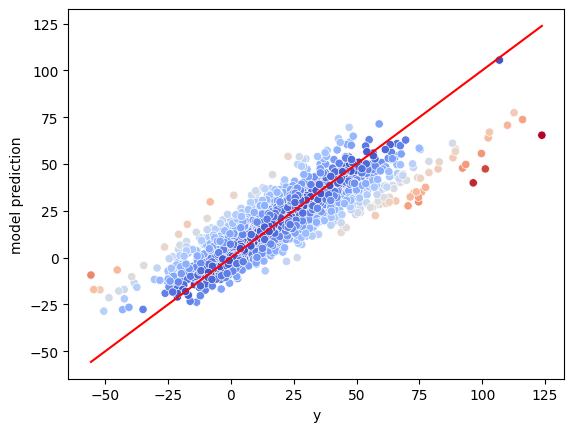

In [45]:
plot_scores_reg(model = final_model, X_val = X_test, y_val = y_test)

In [152]:
import numpy as np

n_verteces, start, end = map(int, input().split())
n_exp = n_verteces//2
matrix_of_cofficents = np.matrix(np.zeros((n_exp, n_exp)))
matrix_of_cofficents[0, 0] = 1
matrix_of_cofficents[0, 1] = -1/n_verteces
for i in range(1, n_exp-1):
    matrix_of_cofficents[i, i-1] = -(n_verteces - i -1)/n_verteces
    matrix_of_cofficents[i, i] = 1
    matrix_of_cofficents[i, i+1] = -(i+1)/n_verteces
if n_verteces % 2 == 0:
    matrix_of_cofficents[n_exp-1, n_exp -2] = -1
    matrix_of_cofficents[n_exp-1, n_exp -1] = 1
else:
    matrix_of_cofficents[n_exp-1, n_exp -1] = (n_exp+1)/n_verteces
    matrix_of_cofficents[n_exp-1, n_exp -2] = -(n_exp+1)/n_verteces
print(matrix_of_cofficents)
for i in range(n_exp):
    vector = np.zeros(n_exp)
    vector[i] = 1
    print(matrix_of_cofficents.dot(vector))
vector = np.ones(n_exp)*n_verteces/(n_verteces-1)
print(matrix_of_cofficents.dot(vector))
print(1 -1/n_verteces)
vector2 = np.zeros(n_exp)
vector2[0] = 1
vector2 -= vector
vector2 /= matrix_of_cofficents[1,0]
vector2 += vector
print(matrix_of_cofficents.dot(vector2))



[[ 1.  -0.1  0.   0.   0. ]
 [-0.8  1.  -0.2  0.   0. ]
 [ 0.  -0.7  1.  -0.3  0. ]
 [ 0.   0.  -0.6  1.  -0.4]
 [ 0.   0.   0.  -1.   1. ]]
[[ 1.  -0.8  0.   0.   0. ]]
[[-0.1  1.  -0.7  0.   0. ]]
[[ 0.  -0.2  1.  -0.6  0. ]]
[[ 0.   0.  -0.3  1.  -1. ]]
[[ 0.   0.   0.  -0.4  1. ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.19417587e-17
  0.00000000e+00]]
0.9
[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00 -5.55111512e-17
   0.00000000e+00]]


In [153]:
size = n_exp
print(np.matrix(np.diag(np.ones(size))) + np.matrix(np.diag((-np.arange(size-1)-1)/(n_verteces), 1)) + np.matrix(np.diag((np.arange(size-1)-1)/(n_verteces)-1 + 3/n_verteces, -1)))
diag = np.ones(size)
bot = (np.arange(size-1)-1)/(n_verteces)-1 + 3/n_verteces
top = (-np.arange(size-1)-1)/(n_verteces)
if n_verteces % 2 == 0:
    bot[size-2] = -1
print(np.diag(diag) + np.diag(bot, -1) + np.diag(top, 1))

[[ 1.  -0.1  0.   0.   0. ]
 [-0.8  1.  -0.2  0.   0. ]
 [ 0.  -0.7  1.  -0.3  0. ]
 [ 0.   0.  -0.6  1.  -0.4]
 [ 0.   0.   0.  -0.5  1. ]]
[[ 1.  -0.1  0.   0.   0. ]
 [-0.8  1.  -0.2  0.   0. ]
 [ 0.  -0.7  1.  -0.3  0. ]
 [ 0.   0.  -0.6  1.  -0.4]
 [ 0.   0.   0.  -1.   1. ]]


In [ ]:
def solve_thomas(diag, bot, top, b):
    